<a href="https://colab.research.google.com/github/NYahirGranadosVargas/Proyectos-/blob/main/Yahir_Granados_Vargas_de_Proyecto_M5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.python.framework import ops
from sklearn.metrics import r2_score, mean_squared_error
import requests
from bs4 import BeautifulSoup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Creamos variables para cargar las noticias con las que vamos a comprobar el modelo.


In [ ]:
FAKE_NEWS_URL = "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/"
TRUE_NEWS_URL = "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/"

In [ ]:
fn = pd.read_csv('/content/drive/MyDrive/Ucamp/WELFake_Dataset.csv')
fn.head(15)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
fn['label'].value_counts(normalize=True)

1    0.514404
0    0.485596
Name: label, dtype: float64

Renombreamos el data frame quitando las columnas que no vamos a necesitar para el modelo

In [ ]:
fn=fn[['text','label']]
fn.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


Del nuevo dataframe vamos a checar cuantos datos nulos tiene el dataframe

In [ ]:
completitud = pd.DataFrame(fn.isnull().sum())
completitud

,0
text,39
label,0


In [ ]:
# Hay un diferencia, de la columna text y la acolumna label.
# Hay datos nulos
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
fn_1=fn.dropna()
fn_1.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
fn_1.info() # ya tenemos los datos completos, sin NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72095 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72095 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
#Datos Casi parejos
fn_1.label.value_counts(normalize=True)

1    0.514141
0    0.485859
Name: label, dtype: float64

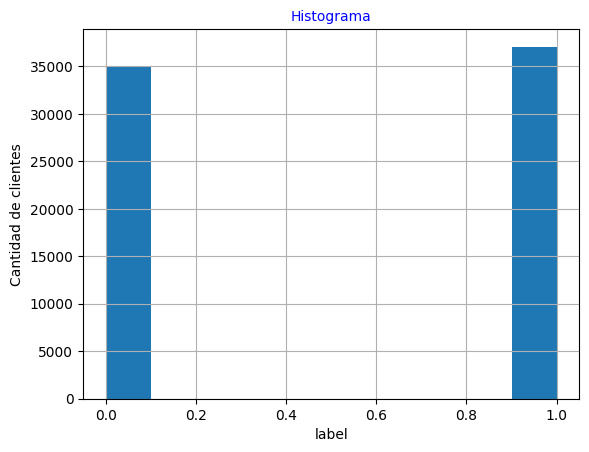

In [ ]:
fn_1['label'].hist() # Existen más persona con un salario entre 7000-10000
plt.title('Histograma',size=10,color="blue")
plt.xlabel("label")
plt.ylabel("Cantidad de clientes")
plt.grid(True)

*Importante limpiar los textos y dejar solo los relevantes*

In [ ]:
# Vamos a definir una funcion que pueda limpiar un poco los datos que vamos a procesar
def clean(text):
  minus=text.lower()
  text = re.sub('https?://\S+|www\. \S+', '', text)
  text = re.sub(' +',' ', text)
  text = re.sub('^ ',' ', text)
  text = re.sub(' $',' ', text)
  return minus

In [ ]:
fn_1['cleaned_text']=fn_1['text'].apply(clean) # Aplicamos la funcion creada a una columna de df
fn_1.head()

<ipython-input-15-e881dc2dfefd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fn_1['cleaned_text']=fn_1['text'].apply(clean) # Aplicamos la funcion creada a una columna de df


,text,label,cleaned_text
0,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...
1,Did they post their votes for Hillary already?,1,did they post their votes for hillary already?
2,"Now, most of the demonstrators gathered last ...",1,"now, most of the demonstrators gathered last ..."
3,A dozen politically active pastors came here f...,0,a dozen politically active pastors came here f...
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"the rs-28 sarmat missile, dubbed satan 2, will..."


In [ ]:
fn_1.head(7)

,text,label,cleaned_text
0,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...
1,Did they post their votes for Hillary already?,1,did they post their votes for hillary already?
2,"Now, most of the demonstrators gathered last ...",1,"now, most of the demonstrators gathered last ..."
3,A dozen politically active pastors came here f...,0,a dozen politically active pastors came here f...
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"the rs-28 sarmat missile, dubbed satan 2, will..."
5,All we can say on this one is it s about time ...,1,all we can say on this one is it s about time ...
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1,dr. ben carson tells the story of what happene...


# A partir de este punto vamos a definir nuestros conjuntos de prueba y conjuntos de entrenamiento

In [ ]:
X=fn_1['cleaned_text']
y=fn_1['label']

In [ ]:
X

0        no comment is expected from barack obama membe...
1           did they post their votes for hillary already?
2         now, most of the demonstrators gathered last ...
3        a dozen politically active pastors came here f...
4        the rs-28 sarmat missile, dubbed satan 2, will...
                               ...                        
72129    washington (reuters) - hackers believed to be ...
72130    you know, because in fantasyland republicans n...
72131    migrants refuse to leave train at refugee camp...
72132    mexico city (reuters) - donald trump’s combati...
72133    goldman sachs endorses hillary clinton for pre...
Name: cleaned_text, Length: 72095, dtype: object

In [ ]:
# paramatros que recibe la funcion
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=18) # 20 poriciento para destinar al test, 18 garantiza que los valores sean los mismos

In [ ]:
y_train.shape, X_train.shape, X.shape, X_test.shape

((57676,), (57676,), (72095,), (14419,))

# Hacemos la toquenizacion de los datos para poder procesarlos.

In [ ]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [ ]:
#Convertimos a numeros Tokenizando
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [ ]:
type(X_train)

list

In [ ]:
len(X_train)

57676

In [ ]:
len(X_train[15])

523

In [ ]:
len(X_train[50000])

744

# Es necesario ajustar los tamaños de los datos para que no se genere el conflicto.

In [ ]:
#Igualar los tamaños
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', truncating='post', maxlen=50)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', truncating='post', maxlen=50)

In [ ]:
X_train.shape, X_test.shape # Tienen la misma cantidad e columnas

((57676, 50), (14419, 50))

In [ ]:
# Definimos el modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=50, input_length=50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [ ]:
# Evaluamos el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Presición Test: %.3f' % acc)

Presición Test: 0.941


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=11,
    validation_split=0.1,
    batch_size=1000,
    shuffle=True,
    callbacks=[early_stop]
)

Epoch 1/11
52/52 [==============================] - 12s 219ms/step - loss: 0.0362 - accuracy: 0.9868 - val_loss: 0.0158 - val_accuracy: 0.9960
Epoch 2/11
52/52 [==============================] - 8s 162ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0142 - val_accuracy: 0.9964
Epoch 3/11
52/52 [==============================] - 5s 97ms/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0.0130 - val_accuracy: 0.9971
Epoch 4/11
52/52 [==============================] - 4s 72ms/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.0122 - val_accuracy: 0.9971
Epoch 5/11
52/52 [==============================] - 5s 104ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.0119 - val_accuracy: 0.9972
Epoch 6/11
52/52 [==============================] - 4s 71ms/step - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.0112 - val_accuracy: 0.9974
Epoch 7/11
52/52 [==============================] - 2s 38ms/step - loss: 0.0224 - accuracy: 0.9921 - val_loss: 0.0109 - val_accuracy: 0.9972
Epoch 8/1

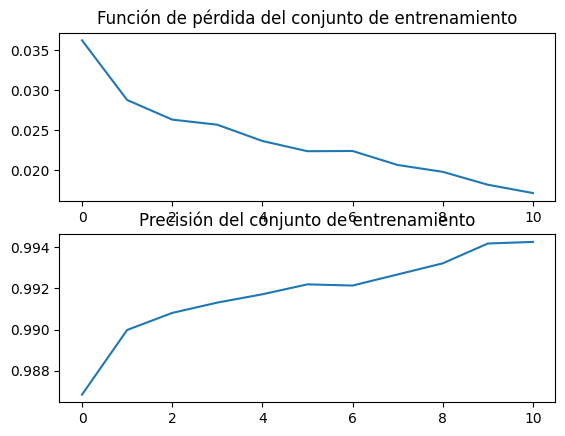

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')

ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['accuracy'])
ax2.set_title('Precisión del conjunto de entrenamiento')

#plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

In [ ]:
# Evaluamos el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Presición Test: %.3f' % acc)

Presición Test: 0.944


In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy * 100

1803/1803 [==============================] - 9s 5ms/step - loss: 0.0059 - accuracy: 0.9989


99.88729953765869

In [ ]:
predictions = model.predict(X_test)
score_r2 = r2_score(y_test, predictions)
score_rmse = np.sqrt(mean_squared_error(y_test, predictions))

451/451 [==============================] - 1s 2ms/step


In [ ]:
print("R2 Score: ", score_r2)
print("RMSE Score: ", score_rmse)

R2 Score:  0.8091928538544219
RMSE Score:  0.21833662961552316


In [ ]:
predictions

array([[0.00157896],
       [0.11274734],
       [0.99999547],
       ...,
       [0.9999969 ],
       [0.99974376],
       [0.9998543 ]], dtype=float32)

In [ ]:
pd.DataFrame({
    "predictions": predictions[:, 0],
    "y_test": y_test,
}).sample(100)

,predictions,y_test
32811,0.999764,1
33504,0.000147,0
27826,0.999996,1
55600,0.000039,0
50043,0.999975,1
...,...,...
24422,0.000298,0
58871,0.999803,1
7636,0.000037,0
8979,0.997224,1


In [ ]:
FAKE_NEWS_URL = "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/"
TRUE_NEWS_URL = "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/"

In [ ]:
def get_news_paragraphs_cleaned_text(url, container_id, paragraphs_element="p", clean=True):
    response = requests.get(url)
    response_text = response.text
    soup = BeautifulSoup(response_text, 'html.parser')

    container = soup.find(id=container_id)
    paragraphs = container.findAll(paragraphs_element)

    text = " ".join([paragraph.get_text() for paragraph in paragraphs])

    if not clean:
        return text

    return clean_text(text)

In [ ]:
fake_cleaned_text=get_news_paragraphs_cleaned_text(
    url=FAKE_NEWS_URL,
    container_id='MainW',
    paragraphs_element="p"
)

NameError: ignored

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
##Library import
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
#Mnist as data set
from keras.datasets import mnist
#np_utils for one hot format
from keras.utils import np_utils
#to create the model container
from keras.models import Sequential
#to implement convolutional layers
from keras.layers.convolutional import Conv2D, MaxPooling2D
#to use the gradient descending method during training
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras import optimizers
# Librerias para crear la matriz de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Use mnist to load data (bitmap of 60 rows of matrix 28x28)
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


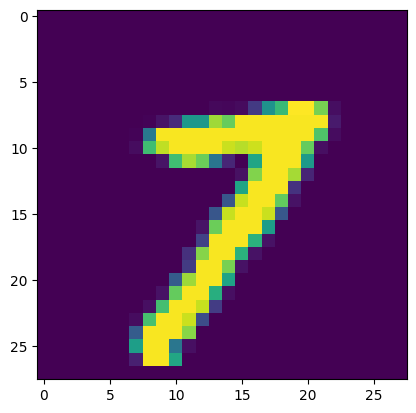

In [ ]:
plt.imshow(x_train[40000])

In [ ]:
print(y_train[40000])

7


In [ ]:
# Cambiar las dimensiones de las imágenes a 28x28x1 y escalar los valores de píxel
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
x_train.shape

(60000, 28, 28, 1)

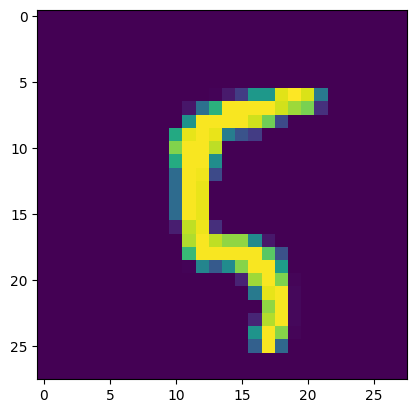

In [ ]:
plt.imshow(x_train[100])

In [ ]:
#Modificamos los valores para poder aplicar el formato one-hot
nclases = 10
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)

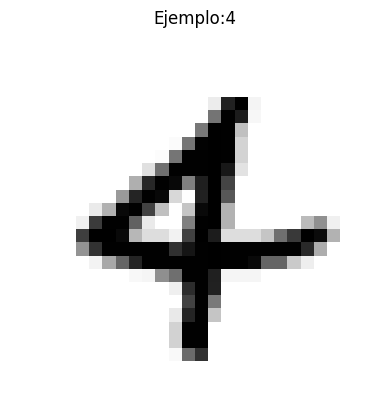

In [ ]:
#To visualize one of the mnist image from the set
nimagen=150
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Ejemplo:' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# Creamos el modelo secuencia con 3 capas

In [ ]:
num_classes = 10

modelo = Sequential()
modelo.add(Conv2D(32, 1, padding='same', input_shape=x_train.shape[1:], activation='relu'))
modelo.add(Conv2D(32, 1, activation='relu'))
modelo.add(MaxPooling2D())
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, 1, padding='same', activation='relu'))
modelo.add(Conv2D(64, 1, activation='relu'))
modelo.add(MaxPooling2D())
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(num_classes, activation='softmax'))


modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        64        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        2112      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        4160      
                                                      

In [ ]:
modelo.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
batch_size = 32
epochs = 10
history = modelo.fit(x_train, y_train, batch_size= batch_size, epochs= epochs,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7268 - acc: 0.7769 - val_loss: 0.4619 - val_acc: 0.8654
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4100 - acc: 0.8694 - val_loss: 0.4084 - val_acc: 0.8809
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3401 - acc: 0.8933 - val_loss: 0.3368 - val_acc: 0.9088
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3047 - acc: 0.9055 - val_loss: 0.3280 - val_acc: 0.9146
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2800 - acc: 0.9138 - val_loss: 0.3450 - val_acc: 0.9237
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2648 - acc: 0.9190 - val_loss: 0.3131 - val_acc: 0.9325
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2533 - acc: 0.9231 - val_loss: 0.3075 - val_acc: 0.9362
Epoch 8/10
1875/1875 [==============================] - 8s 4

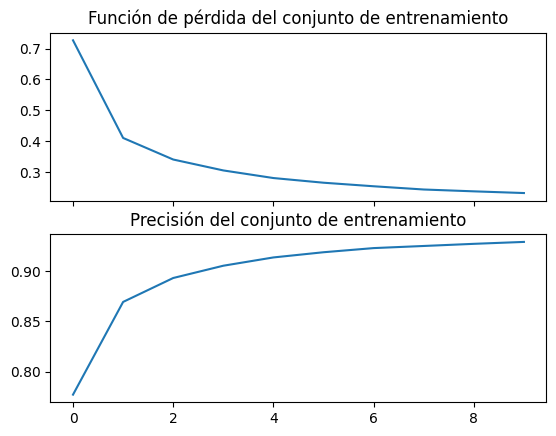

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')
ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['acc'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

In [ ]:
def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):
    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Generamos la ventana para ralizar la grafica.
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Valor real',
           xlabel='Predicción')
    # Fracmento de codigo para rotar los labels X
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

313/313 [==============================] - 1s 3ms/step


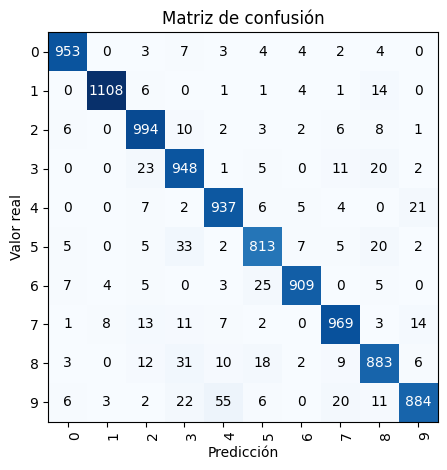

In [ ]:
y_pred = modelo.predict(x_test)
y_ref = np.argmax(y_test,axis=1)
y_pred = np.argmax(y_pred,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)

In [ ]:
# Generate 10 predictions

predictions = modelo.predict(x_test[0:10])
for i in range(len(predictions)):
    print("predicciones", i, ": ", np.argmax(predictions[i]))

1/1 [==============================] - 0s 18ms/step
predicciones 0 :  7
predicciones 1 :  2
predicciones 2 :  1
predicciones 3 :  0
predicciones 4 :  4
predicciones 5 :  1
predicciones 6 :  4
predicciones 7 :  9
predicciones 8 :  5
predicciones 9 :  9
